<a href="https://colab.research.google.com/github/Alena-Ops-CDIN/AI-Exlainability-Observability/blob/main/Copy_of_Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

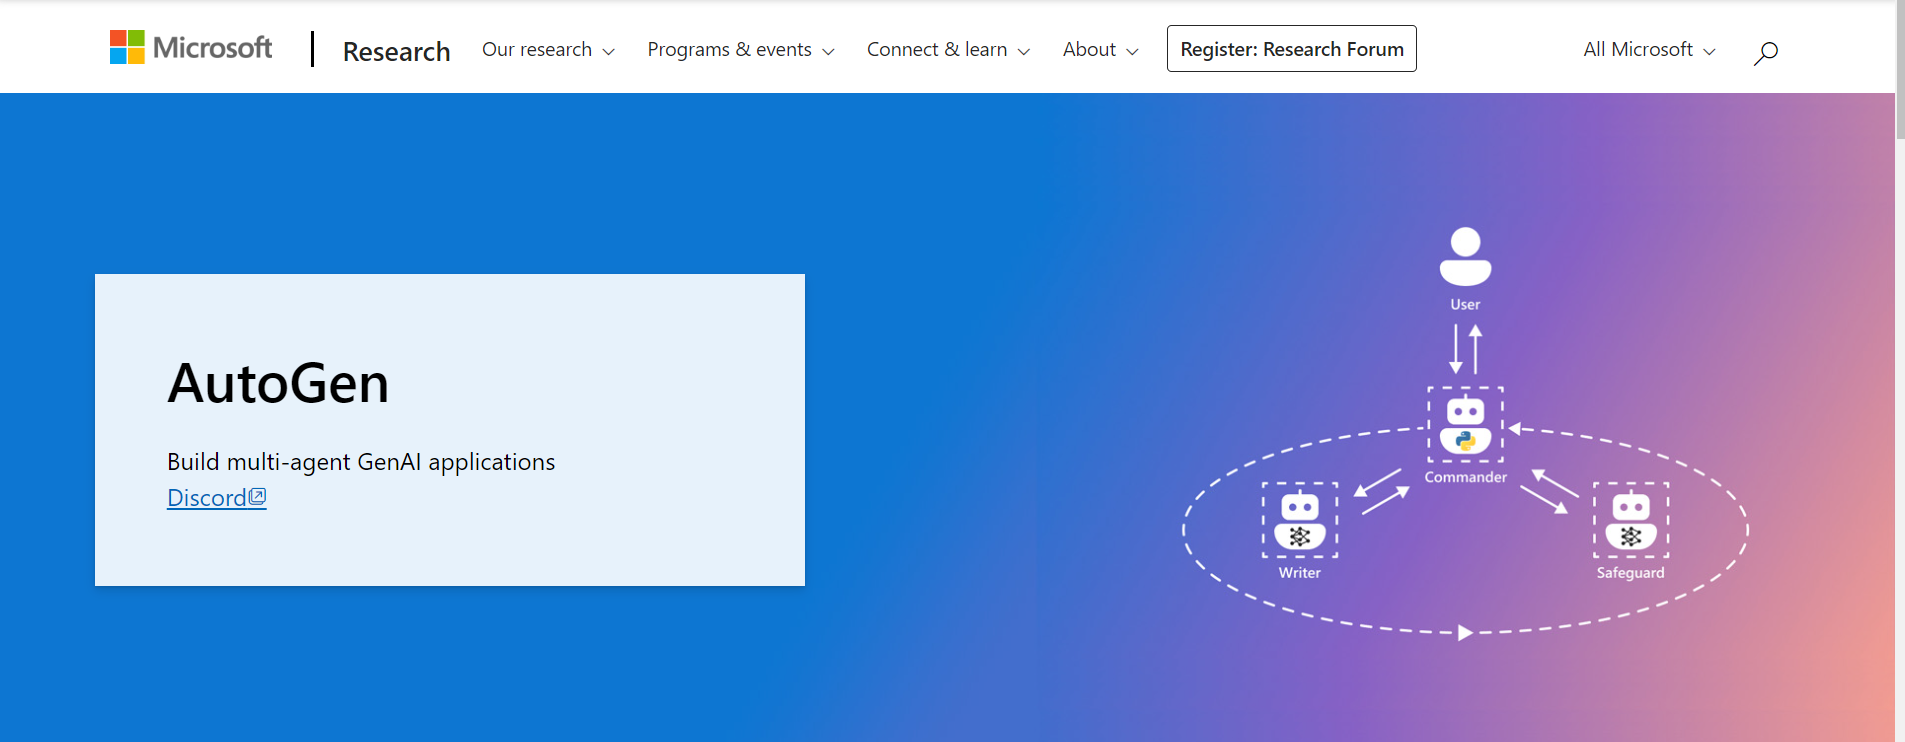

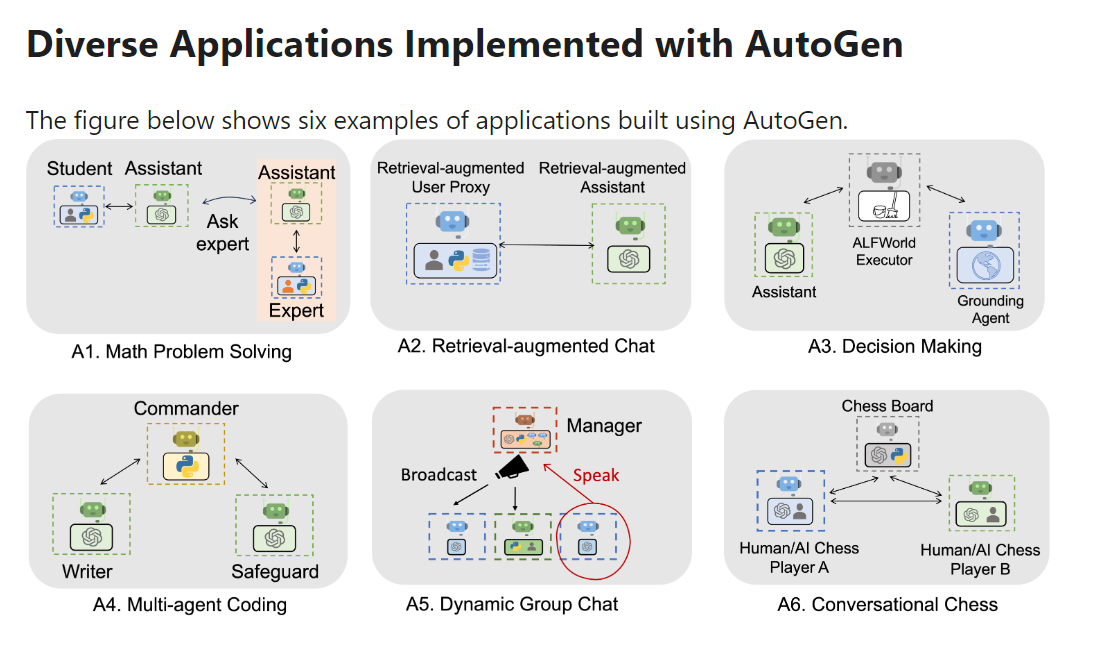

In [ ]:
config_list = [ {
        "model": "",
        "api_key": "",
        "base_url": "",
        "api_type": "azure",
        "api_version": "2024-05-01-preview"
    }]

In [ ]:
# Configuration setup for agents
config_list = [{
    "model": "",
    "api_key": "",
    "base_url": "",
    "api_type": "azure",
    "api_version": "2024-05-01-preview"
}]

# Define the agents with their specific roles and prompts

# Cloud Optimizer Agent
cloud_optimizer = AssistantAgent(
    name="CloudOptimizerAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Cloud Optimizer Agent. Your job is to analyze historical and real-time cloud usage patterns to predict and optimize resource allocation. Suggest resource optimizations based on usage patterns.""",
)

# Resource Allocation Agent
resource_allocator = AssistantAgent(
    name="ResourceAllocationAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Resource Allocation Agent. You dynamically adjust resource allocation based on real-time usage data. Ensure that resources are efficiently allocated without over-provisioning.""",
)

# Waste Reduction Agent
waste_reduction = AssistantAgent(
    name="WasteReductionAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Waste Reduction Agent. Your task is to identify and eliminate resource waste in real-time. Suggest actions to reduce unnecessary resource usage.""",
)

# Performance Optimization Agent
performance_optimizer = AssistantAgent(
    name="PerformanceOptimizationAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Performance Optimization Agent. Optimize resource allocation to maximize performance. Identify performance bottlenecks and suggest improvements.""",
)

# Cost Savings Agent
cost_saver = AssistantAgent(
    name="CostSavingsAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Cost Savings Agent. Identify opportunities for cost savings while maintaining performance. Recommend cost-effective resources and configurations.""",
)

# Security & Compliance Agent
security_compliance = AssistantAgent(
    name="SecurityComplianceAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Security & Compliance Agent. Ensure that all resource allocations and optimizations comply with security standards and regulations. Monitor for potential vulnerabilities and suggest corrective actions.""",
)

# Energy Efficiency Agent
energy_efficiency = AssistantAgent(
    name="EnergyEfficiencyAgent",
    llm_config={"config_list": config_list},
    system_message="""You are the Energy Efficiency Agent. Optimize resource usage to minimize energy consumption. Support sustainable cloud operations with energy-efficient strategies.""",
)

# GroupChat setup for interaction among agents
groupchat = autogen.GroupChat(
    agents=[
        cloud_optimizer,
        resource_allocator,
        waste_reduction,
        performance_optimizer,
        cost_saver,
        security_compliance,
        energy_efficiency,
        critique
    ],
    messages=[], max_round=50
)

manager = autogen.GroupChatManager(
    groupchat=groupchat,
    llm_config={"config_list": config_list}
)

# Example scenario initiation
cloud_optimizer.initiate_chat(
    manager,
    message="""Analyze historical usage patterns and provide a plan to optimize cloud resource allocation for the next quarter."""
)


NameError: name 'AssistantAgent' is not defined

In [ ]:

user_proxy =UserProxyAgent(
    name="Admin",
    system_message="A human admin. Interact with the planner to discuss the plan. Plan execution needs to be approved by this admin.",
    code_execution_config=False,
)
engineer = AssistantAgent(
    name="Engineer",
    llm_config={"config_list": config_list},
    system_message="""Engineer. You follow an approved plan. You write python/shell code to solve tasks. Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
""",
)
scientist = AssistantAgent(
    name="Scientist",
     llm_config={"config_list": config_list},
    system_message="""Scientist. You follow an approved plan. You are able to categorize papers after seeing their abstracts printed. You don't write code.""",
)
planner = AssistantAgent(
    name="Planner",
    system_message="""Planner. Suggest a plan. Revise the plan based on feedback from admin and critic, until admin approval.
The plan may involve an engineer who can write code and a scientist who doesn't write code.
Explain the plan first. Be clear which step is performed by an engineer, and which step is performed by a scientist.
""",
     llm_config={"config_list": config_list},
)
executor = UserProxyAgent(
    name="Executor",
    system_message="Executor. Execute the code written by the engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "paper",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
)
critic = AssistantAgent(
    name="Critic",
    system_message="Critic. Double check plan, claims, code from other agents and provide feedback. Check whether the plan includes adding verifiable info such as source URL.",
     llm_config={"config_list": config_list},
)
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, scientist, planner, executor, critic], messages=[], max_round=50
)
manager = autogen.GroupChatManager(groupchat=groupchat,  llm_config={"config_list": config_list})

In [ ]:
from datetime import datetime, timedelta
import threading
import time
from graphviz import Digraph

def customer_lifetime_value_prediction():
    print("Predicting customer lifetime value...")
    time.sleep(2)
    print("Customer lifetime value prediction complete.")

def customer_segmentation():
    print("Segmenting customers...")
    time.sleep(2)
    print("Customer segmentation complete.")

def personalized_campaigns():
    print("Deploying personalized campaigns...")
    time.sleep(2)
    print("Personalized campaigns deployed.")

def marketing_mix_analysis():
    print("Analyzing marketing mix...")
    time.sleep(2)
    print("Marketing mix analysis complete.")

def budget_optimization():
    print("Optimizing budget allocation...")
    time.sleep(2)
    print("Budget optimization complete.")

def churn_prediction():
    print("Predicting churn...")
    time.sleep(2)
    print("Churn prediction complete.")

def retention_strategy():
    print("Creating retention strategy...")
    time.sleep(2)
    print("Retention strategy created.")

def sales_forecasting():
    print("Forecasting sales...")
    time.sleep(2)
    print("Sales forecasting complete.")

def demand_planning():
    print("Generating demand planning recommendations...")
    time.sleep(2)
    print("Demand planning complete.")

def patient_journey_mapping():
    print("Simulating patient journey...")
    time.sleep(2)
    print("Patient journey mapping complete.")

# Visual workflow generation
def create_visual_workflow():
    dot = Digraph(comment='AI-Driven Business Intelligence Workflow', format='png')
    dot.attr(rankdir='LR', size='12,8', style='filled', color='lightgrey', fontname='Helvetica')
    dot.node_attr.update(style='filled', color='lightblue', shape='box', fontname='Helvetica')

    dot.node('A', 'Start', shape='ellipse', color='green')
    dot.node('B', 'Customer Lifetime Value Prediction')
    dot.node('C', 'Customer Segmentation')
    dot.node('D', 'Personalized Campaigns')
    dot.node('E', 'Marketing Mix Analysis')
    dot.node('F', 'Budget Optimization')
    dot.node('G', 'Churn Prediction')
    dot.node('H', 'Retention Strategy')
    dot.node('I', 'Sales Forecasting')
    dot.node('J', 'Demand Planning')
    dot.node('K', 'Patient Journey Mapping')
    dot.node('L', 'End', shape='ellipse', color='red')

    # Define edges for task sequence with labels
    dot.edge('A', 'B', label='Start Process')
    dot.edge('B', 'C', label='Predict CLTV')
    dot.edge('C', 'D', label='Segment Customers')
    dot.edge('A', 'E', label='Analyze Mix')
    dot.edge('E', 'F', label='Optimize Budget')
    dot.edge('A', 'G', label='Predict Churn')
    dot.edge('G', 'H', label='Retention Plan')
    dot.edge('A', 'I', label='Forecast Sales')
    dot.edge('I', 'J', label='Plan Demand')
    dot.edge('J', 'K', label='Map Journey')
    dot.edge('K', 'L', label='Complete Workflow')

    # Render and display the workflow
    dot.render('workflow_diagram', cleanup=True)
    print("Beautiful workflow diagram generated: workflow_diagram.png")

# Run the workflow execution and visual generation
if __name__ == "__main__":
    print("Starting AI-driven business intelligence workflow...")
    create_visual_workflow()
    run_workflow()
    print("Workflow execution complete.")


Starting AI-driven business intelligence workflow...
Beautiful workflow diagram generated: workflow_diagram.png
Predicting customer lifetime value...
Customer lifetime value prediction complete.
Segmenting customers...
Customer segmentation complete.
Deploying personalized campaigns...
Personalized campaigns deployed.
Analyzing marketing mix...
Marketing mix analysis complete.
Optimizing budget allocation...
Budget optimization complete.
Predicting churn...
Churn prediction complete.
Creating retention strategy...
Retention strategy created.
Forecasting sales...
Sales forecasting complete.
Generating demand planning recommendations...
Demand planning complete.
Simulating patient journey...
Patient journey mapping complete.
Workflow execution complete.


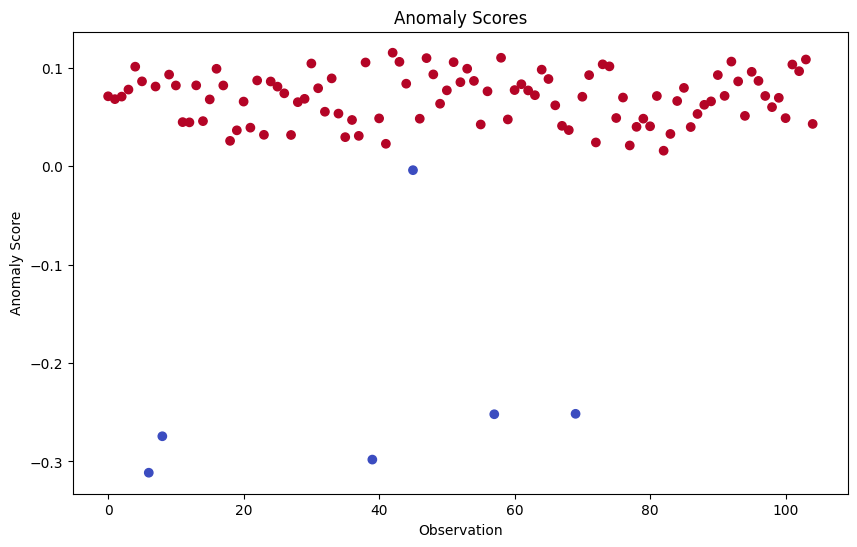

Detected anomalies:
     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
6   -6.650348  -7.908643   2.728605   4.129515  -9.368277   8.724245   
8   -6.009151   3.604565  -8.556032  -9.386950  -4.846342  -0.747541   
39   0.528053   4.631790  -8.367400  -8.792958  -5.057935  -6.809106   
45  -0.275052  -2.301921  -1.515191   1.366874   1.644968  -0.249036   
57  -6.357642   5.793970   3.174156  -0.036086   1.107271   4.384036   
69   4.281739   6.034562  -3.210996   6.296502  -8.397703   7.896333   

    feature_7  feature_8  feature_9  feature_10  anomaly  anomaly_score  
6   -8.960574   0.825927   4.181210    7.419382       -1      -0.311473  
8    7.365450   4.543381   4.854130   -1.490133       -1      -0.274406  
39   7.435671  -5.615720   9.517305   -3.262084       -1      -0.298127  
45   0.576557   0.311250   3.078881    1.119575       -1      -0.003955  
57  -5.430905   9.926678   9.495863    3.006514       -1      -0.252037  
69   0.951848   6.345955  -0.9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Data Generation
def generate_synthetic_data(num_samples=100, num_features=10, anomaly_ratio=0.05):
    np.random.seed(42)

    # Generate normal data
    data = np.random.randn(num_samples, num_features)

    # Inject some anomalies
    num_anomalies = int(num_samples * anomaly_ratio)
    anomalies = np.random.uniform(low=-10, high=10, size=(num_anomalies, num_features))

    # Combine the data
    all_data = np.vstack([data, anomalies])

    # Shuffle the dataset
    np.random.shuffle(all_data)

    return pd.DataFrame(all_data, columns=[f'feature_{i+1}' for i in range(num_features)])

# Generate synthetic data
data = generate_synthetic_data()

# Step 2: Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Anomaly Detection Model
model = IsolationForest(contamination=0.05, random_state=42)

# Step 4: Model Training and Application
model.fit(data_scaled)
anomaly_scores = model.decision_function(data_scaled)
anomalies = model.predict(data_scaled)

# Step 5: Mark anomalies
data['anomaly'] = anomalies
data['anomaly_score'] = anomaly_scores

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['anomaly_score'], c=data['anomaly'], cmap='coolwarm')
plt.title('Anomaly Scores')
plt.xlabel('Observation')
plt.ylabel('Anomaly Score')
plt.show()

# Print the anomalies
anomalies_df = data[data['anomaly'] == -1]
print("Detected anomalies:\n", anomalies_df)